##### The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table.

And then the professors at University of Michigan formatted the fruits data slightly. The Python library and the dataset is open for learning purposes.

The goal of this problem is to design a Machine Learning solution which can predict the fruit, given it's mass, width, height and color score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_table("fruit_data_with_colors.txt")
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
dataset.shape
#59 rows and 7 features!

(59, 7)

In [4]:
#5 unique fruits!
dataset['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [5]:
dataset.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

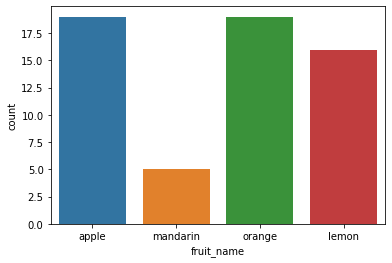

In [6]:
sns.countplot(dataset['fruit_name'],label="Count")
plt.show()

In [7]:
dataset.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can also observe that, numeric values do not have same scale. Thus, we need feature scaling to covert them into same numeric range.

In [8]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = dataset[feature_names].values
y = dataset['fruit_name'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Let's build actual models and compare them!

#### Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
LRRegressor = LogisticRegression(random_state=1,n_jobs=-1)
LRRegressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [12]:
print("Training Accuracy on LR : ",LRRegressor.score(X_train,y_train) * 100)
print("Testing Accuracy on LR : ",LRRegressor.score(X_test,y_test) * 100)

Training Accuracy on LR :  80.85106382978722
Testing Accuracy on LR :  41.66666666666667


#### Decision Tree Classifier Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
DTRegressor = DecisionTreeClassifier(criterion='gini',random_state=1)
DTRegressor.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
print("Training Accuracy on Decision Tree : ",DTRegressor.score(X_train,y_train) * 100)
print("Testing Accuracy on Decision Tree : ",DTRegressor.score(X_test,y_test) * 100)

Training Accuracy on Decision Tree :  100.0
Testing Accuracy on Decision Tree :  100.0


#### KNN Classifier Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNNRegressor = KNeighborsClassifier(n_neighbors=1,n_jobs=-1,weights='distance')
KNNRegressor.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

In [16]:
print("Training Accuracy on KNN : ",KNNRegressor.score(X_train,y_train) * 100)
print("Testing Accuracy on KNN : ",KNNRegressor.score(X_test,y_test) * 100)

Training Accuracy on KNN :  100.0
Testing Accuracy on KNN :  91.66666666666666


### Ending Notes:
This is an intro project for ML practioners. As beginners may wonder how can we achieve 100% with ease, the reason is as dataset is very small,we get 100% accuracy on simple algorithms.

